Número de comunidades detectadas: 2
Comunidad 1: [1, 2, 4, 7]
Comunidad 2: [0, 3, 6]


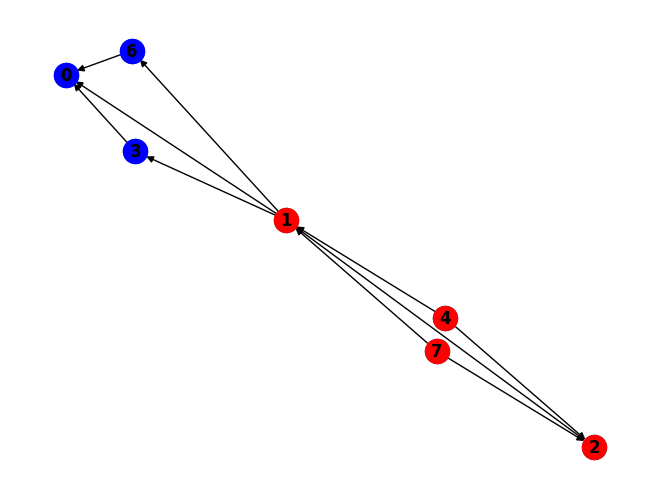

In [1]:
import networkx as nx
from networkx.algorithms.community import girvan_newman
from itertools import islice

# Crear un grafo dirigido de ejemplo
G = nx.DiGraph()
G.add_edges_from([(1,0), (1, 2), (3, 0), (1,3), (4, 2), (4, 1), (6, 0), (1, 6), (7, 2), (7, 1)])
# G.add_edges_from([(0,1), (2, 1), (0, 3), (3,1), (2, 4), (1, 4), (0, 6), (6, 1), (2, 7), (1, 7)])
pos = nx.spring_layout(G, seed=7)
nx.draw(G, pos, with_labels=True, font_weight='bold')
# Detectar comunidades usando el algoritmo Girvan-Newman
comp = girvan_newman(G)
limited = list(islice(comp, 1))

# Obtener los resultados
comunidades = [list(community) for community in limited[0]]
print(f'Número de comunidades detectadas: {len(comunidades)}')
for i, community in enumerate(comunidades):
    print(f'Comunidad {i + 1}: {community}')
nx.draw_networkx_nodes(G, pos, nodelist=comunidades[0], node_color='r')
nx.draw_networkx_nodes(G, pos, nodelist=comunidades[1], node_color='b')

Número de comunidades detectadas: 2
Comunidad 1: [0, 1, 3, 6]
Comunidad 2: [2, 4, 7]


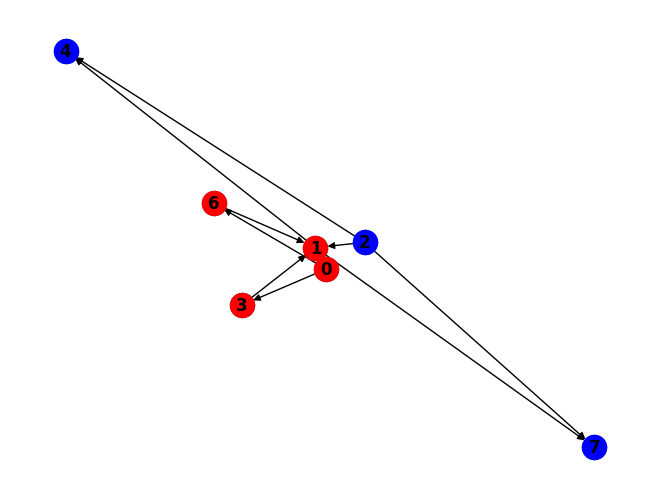

In [2]:
import networkx as nx
from networkx.algorithms.community import girvan_newman
from itertools import islice

# Crear un grafo dirigido de ejemplo
G = nx.DiGraph()
# G.add_edges_from([(1,0), (1, 2), (3, 0), (1,3), (4, 2), (4, 1), (6, 0), (1, 6), (7, 2), (7, 1)])
G.add_edges_from([(0,1), (2, 1), (0, 3), (3,1), (2, 4), (1, 4), (0, 6), (6, 1), (2, 7), (1, 7)])
pos = nx.spring_layout(G, seed=7)
nx.draw(G, pos, with_labels=True, font_weight='bold')
# Detectar comunidades usando el algoritmo Girvan-Newman
comp = girvan_newman(G)
limited = list(islice(comp, 1))

# Obtener los resultados
comunidades = [list(community) for community in limited[0]]
print(f'Número de comunidades detectadas: {len(comunidades)}')
for i, community in enumerate(comunidades):
    print(f'Comunidad {i + 1}: {community}')
nx.draw_networkx_nodes(G, pos, nodelist=comunidades[0], node_color='r')
nx.draw_networkx_nodes(G, pos, nodelist=comunidades[1], node_color='b')

E (1, 2)
E (0, 3)
Número de comunidades detectadas: 2
Comunidad 1: [0, 1]
Comunidad 2: [2, 3, 4]


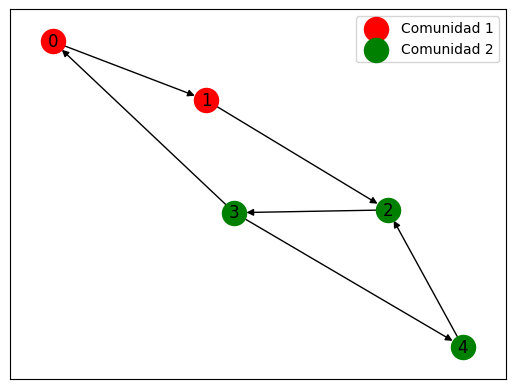

In [3]:
import networkx as nx
from networkx.algorithms.community import girvan_newman
from itertools import islice

# Crear un grafo dirigido y ponderado de ejemplo
G = nx.DiGraph()
G.add_weighted_edges_from([(0, 1, 3), (1, 2, 1), (2, 3, 2), (3, 0, 4), (3, 4, 5), (4, 2, 1)])

# Definir una función para encontrar la arista con la mayor centralidad de intermediación ponderada
def most_valuable_edge(G):
    centrality = nx.edge_betweenness_centrality(G, weight='weight')
    print('E', max(centrality, key=centrality.get))
    return max(centrality, key=centrality.get)

# Detectar comunidades usando el algoritmo Girvan-Newman considerando pesos
comp = girvan_newman(G, most_valuable_edge=most_valuable_edge)

# Obtener la partición en el primer nivel de división
limited = list(islice(comp, 1))
communities = [list(community) for community in limited[0]]

# Imprimir los resultados
print(f'Número de comunidades detectadas: {len(communities)}')
for i, community in enumerate(communities):
    print(f'Comunidad {i + 1}: {community}')

# Visualización opcional
import matplotlib.pyplot as plt

pos = nx.spring_layout(G)  # Posiciones de los nodos
colors = ['r', 'g', 'b', 'y', 'c', 'm']  # Colores para las comunidades
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=colors[i % len(colors)], label=f'Comunidad {i + 1}')
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)

plt.legend()
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_28692\913743065.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', len(communities) + 1)


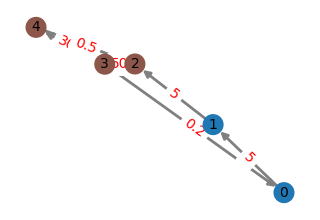

Número de comunidades detectadas: 2
Comunidad 1: [0, 1]
Comunidad 2: [2, 3, 4]


In [4]:
# ESTE ES EL BUENO
import networkx as nx
from networkx.algorithms.community import girvan_newman
from itertools import islice
import matplotlib.pyplot as plt

# Crear un grafo dirigido y ponderado de ejemplo
G = nx.DiGraph()
edges = [(0, 1, 5), (1, 2, 5), (2, 3, 50), (3, 0, 0.2), (3, 4, 300), (4, 2, 0.5)]
G.add_weighted_edges_from(edges)

# Definir una función para encontrar la arista con la mayor centralidad de intermediación ponderada
def most_valuable_edge(G):
    centrality = nx.edge_betweenness_centrality(G)
    return max(centrality, key=centrality.get)

# Detectar comunidades usando el algoritmo Girvan-Newman considerando pesos
comp = girvan_newman(G, most_valuable_edge=most_valuable_edge)

# Obtener la partición en el primer nivel de división
limited = list(islice(comp, 1))
communities = [list(community) for community in limited[0]]

# Asignar colores a los nodos según las comunidades detectadas
node_color = []
color_map = plt.cm.get_cmap('tab10', len(communities) + 1)
for node in G.nodes():
    found = False
    for i, community in enumerate(communities):
        if node in community:
            node_color.append(color_map(i))
            found = True
            break
    if not found:
        node_color.append(color_map(len(communities)))  # color para nodos que no están en ninguna comunidad

# Preparar etiquetas de peso de aristas
edge_labels = {(u, v): f'{d["weight"]}' for u, v, d in G.edges(data=True)}

# Visualización del grafo con pesos de aristas y colores de nodos según comunidades
plt.figure(figsize=(3,2))
pos = nx.spring_layout(G, seed=9)  # Posiciones de los nodos
nx.draw(G, pos, with_labels=True, node_color=node_color, edge_color='gray', width=2, font_size=10, node_size=200)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.show()

# Imprimir los resultados de las comunidades detectadas
print(f'Número de comunidades detectadas: {len(communities)}')
for i, community in enumerate(communities):
    print(f'Comunidad {i + 1}: {community}')


Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'graph_tool', 'wurlitzer', 'bayanpy'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


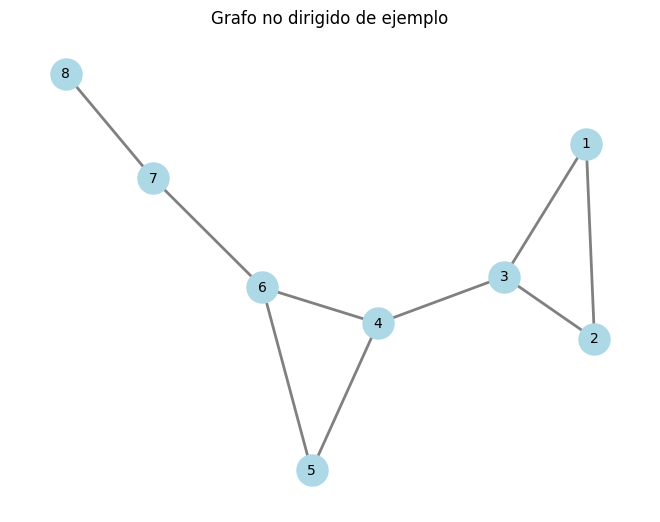

Número de comunidades detectadas: 3
Comunidad 1: [1, 2, 3]
Comunidad 2: [4, 5, 6]
Comunidad 3: [7, 8]


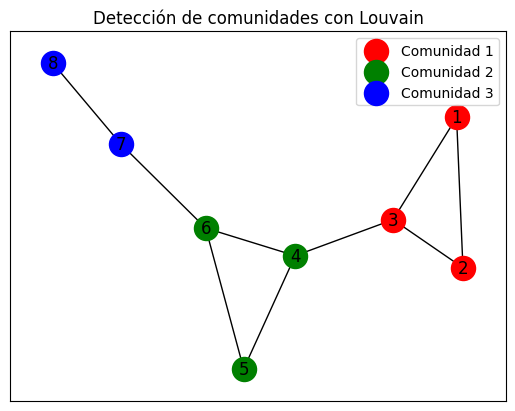

In [5]:
import networkx as nx
from cdlib import algorithms
import matplotlib.pyplot as plt

# Crear un grafo no dirigido de ejemplo
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (4, 6), (5, 6), (6, 7), (7, 8)])

# Visualización del grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', width=2, font_size=10, node_size=500)
plt.title('Grafo no dirigido de ejemplo')
plt.show()

# Detectar comunidades usando el algoritmo Louvain
communities = algorithms.louvain(G)

# Obtener los resultados
print(f'Número de comunidades detectadas: {len(communities.communities)}')
for i, community in enumerate(communities.communities):
    print(f'Comunidad {i + 1}: {community}')

# Visualización de comunidades en el grafo
colors = ['r', 'g', 'b', 'y', 'c', 'm']
plt.figure()
for i, community in enumerate(communities.communities):
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=colors[i % len(colors)], label=f'Comunidad {i + 1}')
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.title('Detección de comunidades con Louvain')
plt.legend()
plt.show()


asdasdasd


In [6]:
import pandas as pd

# Crear dos DataFrames, uno por comunidad, cada uno con usuarios y retweets
comunidad_1 = pd.DataFrame({
    'Usuario': ['Paco', 'Pepe', 'Antonio', 'PaP', 'POOOP'],
    'Retweets': [350, 20, 5, 3, 5]
})

comunidad_2 = pd.DataFrame({
    'Usuario': ['Aurelio', 'Esteban'],
    'Retweets': [5, 3]
})

# Datos de ejemplo
comunidades = {
    'Comunidad 1': comunidad_1,
    'Comunidad 2': comunidad_2
}

import tkinter as tk
from tkinter import ttk

class App:
    def __init__(self, root):
        self.root = root
        self.root.title("Personalización de Difusión de Tweets")

        self.selecciones = {}

        # Crear frames para cada comunidad
        for i, (nombre_comunidad, df_comunidad) in enumerate(comunidades.items()):
            frame = ttk.LabelFrame(root, text=nombre_comunidad)
            frame.grid(row=i, column=0, padx=10, pady=10, sticky='nw')

            self.selecciones[nombre_comunidad] = []

            for _, row in df_comunidad.iterrows():
                usuario = row['Usuario']
                retweets = row['Retweets']

                var = tk.BooleanVar()
                chk = ttk.Checkbutton(frame, text=f"{usuario} ({retweets} retweets)", variable=var)
                chk.pack(anchor='w')
                self.selecciones[nombre_comunidad].append((usuario, retweets, var))

        # Botón para Confirmar
        self.confirmar_btn = tk.Button(root, text="Confirmar", command=self.confirmar_seleccion)
        self.confirmar_btn.grid(row=len(comunidades), column=0, padx=10, pady=10)

    def confirmar_seleccion(self):
        seleccion_confirmada = {}
        for nombre_comunidad, usuarios in self.selecciones.items():
            seleccion_confirmada[nombre_comunidad] = [
                (usuario, retweets) for usuario, retweets, var in usuarios if var.get()
            ]
        print("Selección Confirmada:", seleccion_confirmada)
        # Aquí se puede agregar la lógica para proceder con la difusión de tweets

root = tk.Tk()
app = App(root)
root.mainloop()


In [ ]:
import tkinter as tk
from tkinter import ttk, messagebox
import pandas as pd
import customtkinter as ctk

# Crear dos DataFrames, uno por comunidad, cada uno con usuarios y retweets
comunidad_1 = pd.DataFrame({
    'Usuario': ['Paco', 'Pepe', 'Antonio', 'Luis', 'Miguel', 'Carlos', 'Paco', 'Pepe', 'Antonio', 'Luis', 'Miguel', 'Carlos'],
    'Retweets': [350, 20, 5, 100, 75, 50, 350, 20, 5, 100, 75, 50]
})

comunidad_2 = pd.DataFrame({
    'Usuario': ['Aurelio', 'Esteban', 'Juan', 'Pedro', 'María', 'Ana', 'Aurelio', 'Esteban', 'Juan', 'Pedro', 'María', 'Ana'],
    'Retweets': [5, 3, 10, 20, 30, 40, 5, 3, 10, 20, 30, 40]
})

# Datos de ejemplo
comunidades = {
    'Comunidad 1': comunidad_1,
    'Comunidad 2': comunidad_2
}

# Configuración inicial de la ventana
ctk.set_appearance_mode("dark")
ctk.set_default_color_theme("blue")

window = ctk.CTk()
window.title("Parámetros de la simulación")
window.geometry("550x615")

# Crear un notebook
notebook = ttk.Notebook(window)
notebook.grid(row=0, column=0, columnspan=2, padx=20, pady=10)

# Pestaña 1: Parámetros de simulación
tab1 = ctk.CTkFrame(notebook)
notebook.add(tab1, text="Simulación")

info_dataframes = ctk.CTkLabel(tab1, text="Seleccione los parámetros que desee:", font=("Helvetica", 14, "bold"))
info_dataframes.grid(row=0, column=0, padx=20, pady=10, sticky='w')

n_usuarios_label = ctk.CTkLabel(tab1, text="Nº top usuarios/métrica:", font=("Helvetica", 14))
n_usuarios_label.grid(row=1, column=0, padx=20, pady=10, sticky='w')
n_usuarios_entry = ctk.CTkEntry(tab1, font=("Helvetica", 14))
n_usuarios_entry.grid(row=1, column=1, padx=20, pady=10, sticky='w')
n_usuarios_entry.insert(0, '6')

precio_establecido_label = ctk.CTkLabel(tab1, text="Presupuesto:", font=("Helvetica", 14))
precio_establecido_label.grid(row=2, column=0, padx=20, pady=10, sticky='w')
precio_establecido_entry = ctk.CTkEntry(tab1, font=("Helvetica", 14))
precio_establecido_entry.grid(row=2, column=1, padx=20, pady=10, sticky='w')
precio_establecido_entry.insert(0, '10000')

nombre_atributo = ctk.CTkLabel(tab1, text="Nombre del atributo:", font=("Helvetica", 14))
nombre_atributo.grid(row=3, column=0, padx=20, pady=10, sticky='w')
nombre_atributo_entry = ctk.CTkEntry(tab1, font=("Helvetica", 14))
nombre_atributo_entry.grid(row=3, column=1, padx=20, pady=10, sticky='w')
nombre_atributo_entry.insert(0, 'mensaje')

tick_enviar_gephi = ctk.IntVar()
tick_enviar_gephi.set(1)
enviar_gephi_checkbox = ctk.CTkCheckBox(tab1, text="Enviar a Gephi", variable=tick_enviar_gephi, font=("Helvetica", 14))
enviar_gephi_checkbox.grid(row=10, column=0, columnspan=2, padx=20, pady=10)

info_dataframes = ctk.CTkLabel(tab1, text="Seleccione las métricas a tener en cuenta:", font=("Helvetica", 14, "bold"))
info_dataframes.grid(row=4, column=0, padx=20, pady=10, sticky='w')

# In degree       
in_degree_tick = ctk.IntVar()
in_degree_tick.set(1)
in_degree_checkbox = ctk.CTkCheckBox(tab1, text="In Degree", variable=in_degree_tick, font=("Helvetica", 14))
in_degree_checkbox.grid(row=5, column=0, columnspan=2, padx=20, pady=10, sticky='w')

# Closeness centrality
closeness_tick = ctk.IntVar()
closeness_tick.set(1)
closeness_checkbox = ctk.CTkCheckBox(tab1, text="Closeness Centrality", variable=closeness_tick, font=("Helvetica", 14))
closeness_checkbox.grid(row=6, column=0, columnspan=2, padx=20, pady=10, sticky='w')

# Eigenvector centrality
eigenvector_tick = ctk.IntVar()
eigenvector_tick.set(1)
eigenvector_checkbox = ctk.CTkCheckBox(tab1, text="Eigenvector Centrality", variable=eigenvector_tick, font=("Helvetica", 14))
eigenvector_checkbox.grid(row=7, column=0, columnspan=2, padx=20, pady=10, sticky='w')

# PageRank
pagerank_tick = ctk.IntVar()
pagerank_tick.set(1)
pagerank_checkbox = ctk.CTkCheckBox(tab1, text="PageRank", variable=pagerank_tick, font=("Helvetica", 14))
pagerank_checkbox.grid(row=8, column=0, columnspan=2, padx=20, pady=10, sticky='w')

# Betweenness centrality
betweenness_tick = ctk.IntVar()
betweenness_tick.set(1)
betweenness_checkbox = ctk.CTkCheckBox(tab1, text="Betweenness Centrality", variable=betweenness_tick, font=("Helvetica", 14))
betweenness_checkbox.grid(row=9, column=0, columnspan=2, padx=20, pady=10, sticky='w')

def msgbox_con_lista_usuarios_y_nodos_alcanzados(dummy_arg):
    messagebox.showinfo("Info", "Esto es un mensaje de prueba para la pestaña de simulación.")

adjust_button = ctk.CTkButton(tab1, text="Evaluar", command=lambda: msgbox_con_lista_usuarios_y_nodos_alcanzados(0), font=("Helvetica", 14))
adjust_button.grid(row=11, column=0, columnspan=2, padx=20, pady=10)

# Pestaña 2: Parámetros de comunidades
tab2 = ctk.CTkFrame(notebook)
notebook.add(tab2, text="Probanding")

# Crear una etiqueta con la lista de nodos obtenidos en la primera pestaña
nodos_label_p2 = ctk.CTkLabel(tab2, text=f"Nodos obtenidos:", font=("Helvetica", 14, "bold"))
nodos_label_p2.grid(row=0, column=0, padx=20, pady=10, sticky='w')




# Pestaña 3: Parámetros de comunidades
tab3 = ctk.CTkFrame(notebook)
notebook.add(tab3, text="Comunidades")

# Crear un canvas dentro de la pestaña 2
canvas = tk.Canvas(tab3)
scrollbar = ttk.Scrollbar(tab3, orient="vertical", command=canvas.yview)
scrollable_frame = ctk.CTkFrame(canvas)

scrollable_frame.bind(
    "<Configure>",
    lambda e: canvas.configure(
        scrollregion=canvas.bbox("all")
    )
)

canvas.create_window((0, 0), window=scrollable_frame, anchor="nw")
canvas.configure(yscrollcommand=scrollbar.set)

canvas.grid(row=0, column=0, sticky="nsew")
scrollbar.grid(row=0, column=1, sticky="ns")

tab3.grid_rowconfigure(0, weight=1)
tab3.grid_columnconfigure(0, weight=1)

class ComunidadApp:
    def __init__(self, root):
        self.root = root
        self.selecciones = {}

        # Crear frames para cada comunidad
        for i, (nombre_comunidad, df_comunidad) in enumerate(comunidades.items()):
            frame = ctk.CTkFrame(root)
            frame.grid(row=i, column=0, padx=10, pady=10, sticky='nw')
            
            comunidad_label = ctk.CTkLabel(frame, text=nombre_comunidad, font=("Helvetica", 14, "bold"))
            comunidad_label.grid(row=0, column=0, sticky='w')
            
            self.selecciones[nombre_comunidad] = []

            for j, row in df_comunidad.iterrows():
                usuario = row['Usuario']
                retweets = row['Retweets']
                
                var = tk.BooleanVar()
                chk = ctk.CTkCheckBox(frame, text=f"{usuario} ({retweets} retweets)", variable=var, font=("Helvetica", 14))
                chk.grid(row=j+1, column=0, sticky='w')
                self.selecciones[nombre_comunidad].append((usuario, retweets, var))

        # Botón para Confirmar
        self.confirmar_btn = ctk.CTkButton(root, text="Confirmar", command=self.confirmar_seleccion, font=("Helvetica", 14))
        self.confirmar_btn.grid(row=len(comunidades), column=0, padx=10, pady=10)

    def confirmar_seleccion(self):
        seleccion_confirmada = {}
        for nombre_comunidad, usuarios in self.selecciones.items():
            seleccion_confirmada[nombre_comunidad] = [
                (usuario, retweets) for usuario, retweets, var in usuarios if var.get()
            ]
        print("Selección Confirmada:", seleccion_confirmada)
        messagebox.showinfo("Selección Confirmada", f"Selección Confirmada:\n{seleccion_confirmada}")
        # Aquí se puede agregar la lógica para proceder con la difusión de tweets

comunidad_app = ComunidadApp(scrollable_frame)

# Ejecutar el bucle de eventos de tkinter
window.mainloop()


KeyboardInterrupt: 

In [ ]:
import tkinter as tk
import tkinter.ttk as ttk
from tkinter import scrolledtext
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Ejemplo de listas de usuarios (puedes reemplazar esto con tus datos reales)
listas_de_usuarios = [
    ['paco', 'pepe', 'juan'],
    ['pepe', 'antonio', 'meni'],
    # Agrega más listas según sea necesario
]

# Función para generar una wordcloud a partir de una lista de usuarios
def generar_wordcloud(usuarios):
    text = ' '.join(usuarios)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    return wordcloud

# Crear la ventana principal
root = tk.Tk()
root.title("WordClouds por Lista de Usuarios")

# Crear un widget Notebook (pestañas)
notebook = ttk.Notebook(root)
notebook.pack(padx=10, pady=10, fill='both', expand=True)

# Iterar sobre las listas de usuarios y generar pestañas para cada una
for i, lista_usuarios in enumerate(listas_de_usuarios):
    # Crear un frame para la pestaña actual
    frame = ttk.Frame(notebook)
    notebook.add(frame, text=f"Usuarios Lista {i + 1}")
    
    # Crear un ScrolledText para mostrar los usuarios
    usuarios_text = scrolledtext.ScrolledText(frame, wrap=tk.WORD, width=40, height=10)
    usuarios_text.grid(row=0, column=0, padx=10, pady=10, sticky='nsew')
    
    # Mostrar los usuarios en el ScrolledText
    usuarios_text.insert(tk.END, "\n".join(lista_usuarios))
    usuarios_text.configure(state='disabled')  # Deshabilitar la edición del texto
    
    # Generar la wordcloud para la lista actual de usuarios
    wordcloud = generar_wordcloud(lista_usuarios)
    
    # Crear una figura de Matplotlib y generar la wordcloud en ella
    fig = plt.Figure(figsize=(8, 4))
    ax = fig.add_subplot(111)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(f"WordCloud - Lista {i + 1}")
    
    # Crear un lienzo de Matplotlib en tkinter para mostrar la figura
    canvas = FigureCanvasTkAgg(fig, master=frame)
    canvas.draw()
    canvas.get_tk_widget().grid(row=1, column=0, padx=10, pady=10, sticky='nsew')

# Ajustar la geometría de los frames al tamaño del contenido
root.update_idletasks()
root.mainloop()


KeyboardInterrupt: 